<a href="https://colab.research.google.com/github/anumit-web/ML-Analytics-Portfolio-2024/blob/main/2.%20Sales%20Forecasting/Sales_Forecasting_time_series_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

time series

sales forecast

In [127]:
print('Hello')

Hello


In [128]:
from datetime import datetime
print(datetime.now())

2024-09-11 11:34:13.493425


In [129]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf


In [130]:
data_df = pd.read_csv('train3.csv')

# Exploratory Data Analysis, EDA

In [131]:
rows, cols = data_df.shape
print("Dataset contains", rows, "rows and ", cols, "columns.\n")

Dataset contains 55130 rows and  4 columns.



In [132]:
data_df.head()

,Date,store,product,number_sold
0,2010-01-01,0.0,0.0,801.0
1,2010-01-02,0.0,0.0,810.0
2,2010-01-03,0.0,0.0,818.0
3,2010-01-04,0.0,0.0,796.0
4,2010-01-05,0.0,0.0,808.0


In [133]:
data_df.tail()

,Date,store,product,number_sold
55125,2016-12-08,1.0,6.0,640.0
55126,2016-12-09,1.0,6.0,673.0
55127,2016-12-10,1.0,6.0,691.0
55128,2016-12-11,1.0,6.0,664.0
55129,2016-12-12,NaN,NaN,NaN


In [134]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         55130 non-null  object 
 1   store        55129 non-null  float64
 2   product      55129 non-null  float64
 3   number_sold  55129 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.7+ MB


In [135]:
data_df.describe()

,store,product,number_sold
count,55129.000000,55129.000000,55129.000000
mean,0.403762,3.853544,794.323786
std,0.490655,2.660661,105.779205
min,0.000000,0.000000,546.000000
25%,0.000000,2.000000,707.000000
50%,0.000000,4.000000,790.000000
75%,1.000000,6.000000,881.000000
max,1.000000,9.000000,1066.000000


In [136]:
# Convert the column to date type
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%Y-%m-%d', errors='coerce')

In [137]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         55130 non-null  datetime64[ns]
 1   store        55129 non-null  float64       
 2   product      55129 non-null  float64       
 3   number_sold  55129 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 MB


In [138]:
data_df.describe()

,Date,store,product,number_sold
count,55130,55129.000000,55129.000000,55129.000000
mean,2014-06-14 18:13:21.625249280,0.403762,3.853544,794.323786
min,2010-01-01 00:00:00,0.000000,0.000000,546.000000
25%,2012-03-21 00:00:00,0.000000,2.000000,707.000000
50%,2014-06-10 00:00:00,0.000000,4.000000,790.000000
75%,2016-08-29 00:00:00,1.000000,6.000000,881.000000
max,2018-12-31 00:00:00,1.000000,9.000000,1066.000000
std,NaN,0.490655,2.660661,105.779205


In [139]:
data_df.isnull().sum()

,0
Date,0
store,1
product,1
number_sold,1


In [140]:
data_df.agg(['min','max'])

,Date,store,product,number_sold
min,2010-01-01,0.0,0.0,546.0
max,2018-12-31,1.0,9.0,1066.0


In [141]:
data_df['store'].value_counts()

,count
store,
0.0,32870
1.0,22259


In [142]:
data_df['product'].value_counts()

,count
product,
0.0,6574
1.0,6574
2.0,6574
3.0,6574
4.0,6574
5.0,6574
6.0,5824
7.0,3287
8.0,3287


In [143]:
data_df.groupby('store')['product'].value_counts(normalize=False)

store  product
0.0    0.0        3287
       9.0        3287
       8.0        3287
       1.0        3287
       7.0        3287
       6.0        3287
       5.0        3287
       4.0        3287
       3.0        3287
       2.0        3287
1.0    5.0        3287
       4.0        3287
       3.0        3287
       2.0        3287
       1.0        3287
       0.0        3287
       6.0        2537
Name: count, dtype: int64

seperator

In [ ]:
data_df5 = data_df.copy()

In [144]:
data_df = data_df.query('store == 0')
data_df = data_df.query('product == 0')
print(data_df.shape)

(3287, 4)


In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

bar plot of store vs sales

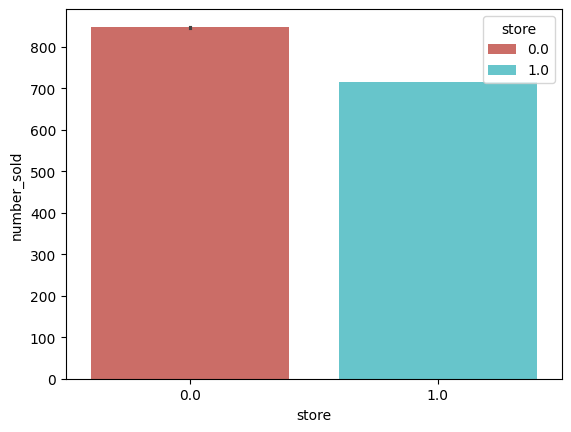

In [146]:
sns.barplot(x = "store", y = "number_sold", hue="store",  palette = 'hls', data = data_df5)
plt.show()

bar plot of products vs sales

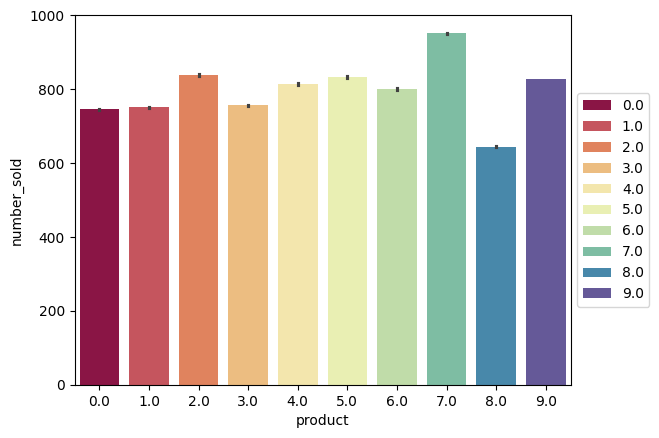

In [147]:
product_barplot = sns.barplot(x = "product", y = "number_sold", hue="product",
                              palette = 'Spectral', data = data_df5, legend = "full")
# move legend outside of bR plot
product_barplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

lineplot

In [148]:
data_df2 = data_df.groupby('Date')['number_sold'].sum()
data_df2 = data_df2.reset_index()
data_df2.head()

,Date,number_sold
0,2010-01-01,801.0
1,2010-01-02,810.0
2,2010-01-03,818.0
3,2010-01-04,796.0
4,2010-01-05,808.0


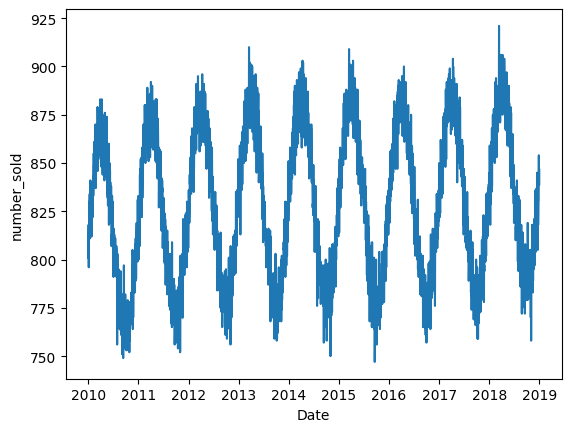

In [149]:
sns.lineplot(data=data_df2, x="Date", y="number_sold", legend="auto")
plt.show()

seperator

# Calculations and processing

In [150]:
data_df4 = data_df.copy()

In [151]:
scaler = MinMaxScaler(feature_range= (0, 1))
data_df4['number_sold_scaled'] = scaler.fit_transform(data_df4[['number_sold']])

In [152]:
data_df4.head()

,Date,store,product,number_sold,number_sold_scaled
0,2010-01-01,0.0,0.0,801.0,0.310345
1,2010-01-02,0.0,0.0,810.0,0.362069
2,2010-01-03,0.0,0.0,818.0,0.408046
3,2010-01-04,0.0,0.0,796.0,0.281609
4,2010-01-05,0.0,0.0,808.0,0.350575


seperator

In [153]:
tss = TimeSeriesSplit(n_splits = 4)

In [154]:
X = data_df4.drop(labels=['number_sold'], axis=1)
y = pd.DataFrame(data_df4['number_sold_scaled'])

X.shape, y.shape
X = X.set_index('Date')
X.shape, y.shape

((3287, 3), (3287, 1))

seperator

In [155]:
n_cols = 1
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2630, 3), (657, 3), (2630, 1), (657, 1))

<Axes: xlabel='Date'>

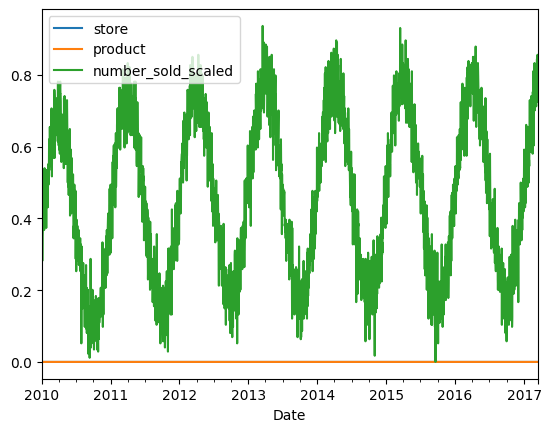

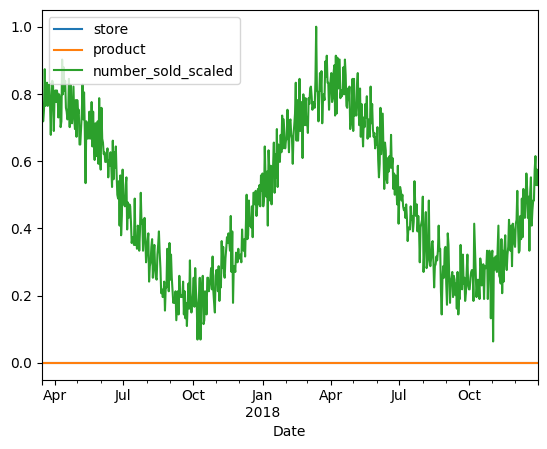

In [156]:
X_train.plot()
X_test.plot()

In [157]:
X_train

,store,product,number_sold_scaled
Date,,,
2010-01-01,0.0,0.0,0.310345
2010-01-02,0.0,0.0,0.362069
2010-01-03,0.0,0.0,0.408046
2010-01-04,0.0,0.0,0.281609
2010-01-05,0.0,0.0,0.350575
...,...,...,...
2017-03-10,0.0,0.0,0.844828
2017-03-11,0.0,0.0,0.775862
2017-03-12,0.0,0.0,0.770115


<Axes: >

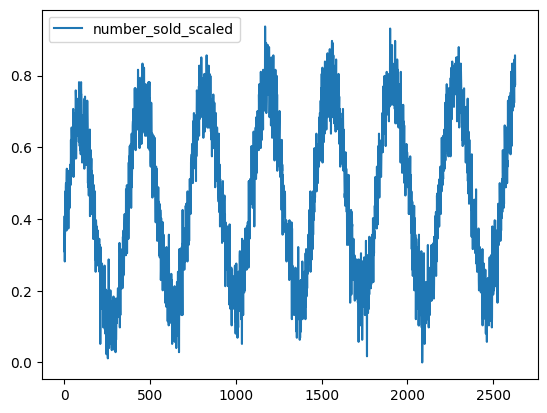

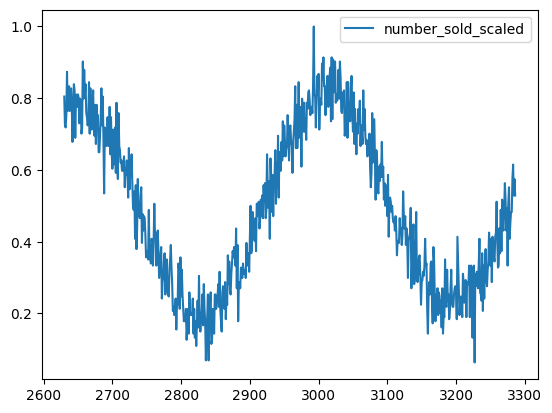

In [158]:
y_train.plot()
y_test.plot()

In [159]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], n_cols), return_sequences=False),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(n_cols)
])

optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01)

model.compile(loss='huber',
              optimizer=optimizer,
              metrics=["mae"])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,169 (90.50 KB)

 Trainable params: 23,169 (90.50 KB)

 Non-trainable params: 0 (0.00 B)

seperator

In [160]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='mae',
                                        patience=10,
                                        verbose=1,
                                        factor=0.5,
                                        min_lr=0.000003)

es = tf.keras.callbacks.EarlyStopping(monitor= 'mae',
                                      patience= 10 ,
                                      restore_best_weights= True,
                                      verbose=1)

callbacks = [learning_rate_reduction, es]

In [ ]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=125,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=2,
                    callbacks=[callbacks]
                   )

Epoch 1/125
165/165 - 3s - 20ms/step - loss: 0.1242 - mae: 0.4480 - val_loss: 0.1284 - val_mae: 0.4593 - learning_rate: 0.0100
Epoch 2/125
165/165 - 1s - 5ms/step - loss: 0.1104 - mae: 0.4183 - val_loss: 0.1135 - val_mae: 0.4275 - learning_rate: 0.0100
Epoch 3/125
165/165 - 1s - 5ms/step - loss: 0.0931 - mae: 0.3761 - val_loss: 0.0900 - val_mae: 0.3704 - learning_rate: 0.0100
Epoch 4/125
165/165 - 1s - 4ms/step - loss: 0.0693 - mae: 0.3129 - val_loss: 0.0637 - val_mae: 0.2959 - learning_rate: 0.0100
Epoch 5/125
165/165 - 1s - 4ms/step - loss: 0.0464 - mae: 0.2477 - val_loss: 0.0410 - val_mae: 0.2261 - learning_rate: 0.0100
Epoch 6/125
165/165 - 1s - 4ms/step - loss: 0.0299 - mae: 0.2008 - val_loss: 0.0268 - val_mae: 0.1851 - learning_rate: 0.0100
Epoch 7/125
165/165 - 1s - 4ms/step - loss: 0.0216 - mae: 0.1778 - val_loss: 0.0206 - val_mae: 0.1695 - learning_rate: 0.0100
Epoch 8/125
165/165 - 1s - 5ms/step - loss: 0.0186 - mae: 0.1690 - val_loss: 0.0183 - val_mae: 0.1644 - learning_rate

# Model Evaluation

Threshold for current model

Threshold for unscaled data

In [ ]:
threshold_mae = (data_df4['number_sold'].max() - data_df4['number_sold'].min()) * 10/100
print(threshold_mae)

Threshold for scaled data

In [ ]:
threshold_mae_scaled = (data_df4['number_sold_scaled'].max() - data_df4['number_sold_scaled'].min()) * 10/100
print(threshold_mae_scaled)

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mae"])
plt.plot(history.history["val_loss"])
plt.plot(history.history["val_mae"])
plt.legend(['Huber Loss','Mean Absolute Error', 'Huber Val Loss', 'Validation Mean Absolute Error '])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
predictions = model.predict(X_test)

# Calculate MAE from predictions

MAE for scaled data

In [ ]:
#Calculate MAE in scaled data
MAE = np.mean( np.abs(y_test - predictions)).round(2)
MAE

MAE for unscaled data

In [ ]:
#inverse y_test scaling
predictions_unscaled = scaler.inverse_transform(predictions)
y_test_unscaled = scaler.inverse_transform(y_test)

MAE = np.mean( np.abs(y_test_unscaled - predictions_unscaled )).round(2)
MAE

The Validation MAE is 0 in scaled and 0.1 in unscaled data, which is far below the threshold (17.4)